In [1]:
import numpy as np
from numpy import linalg as npla
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def eigen(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors)

In [3]:
L=10.0  # box length is 2L; [-L,L]
k=1     # force constant
m=1     # particle mass 
hbar=1  # 1 in atomic units

In [4]:
def fn_V(x):
    psi_i=np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi_j=np.sqrt(1/L)*np.sin((j+1)*(x-L)*np.pi/(2*L))
    fn_V=psi_i * k * x**2/2 * psi_j
    return fn_V

for iN in range(0,6):
    
    N=2**iN    # No. of basis functions

    V=np.zeros([N,N])
    T=np.zeros([N,N])
    H=np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            Int_V=integrate.quadrature(fn_V, -L, L,maxiter=1000)
            V[i][j]=Int_V[0]
        #kinetic energy part is same as in the particle-in-a-box    
        T[i][i]=(i+1)**2 * hbar**2 * np.pi**2 / (8 * m * L**2)

    H=T+V

    E,V=eigen(H)

    print("Number of basis: ", N, ", ground state energy is:", E[0])

Number of basis:  1 , ground state energy is: 6.546885307943111
Number of basis:  2 , ground state energy is: 6.546885307943111
Number of basis:  4 , ground state energy is: 2.240982218626046
Number of basis:  8 , ground state energy is: 0.771292581704222
Number of basis:  16 , ground state energy is: 0.5026588346751286
Number of basis:  32 , ground state energy is: 0.4999999999196107


In [5]:
for i in range(N):
    print(i,E[i])

0 0.4999999999196107
1 1.5000000035335943
2 2.5000000246526937
3 3.5000000749476663
4 4.5000038263809
5 5.500009108730727
6 6.50021356198306
7 7.500380483848286
8 8.504899941732964
9 9.507109605274195
10 10.550503775703714
11 11.563037889597084
12 12.757188589561506
13 13.790161054294604
14 15.274948394336894
15 16.323820558552285
16 18.17582128516402
17 19.223096857606677
18 21.470782180788095
19 22.495304266567445
20 25.15553932068947
21 26.13571096966512
22 29.225350687266758
23 30.139583860300483
24 33.676963488229696
25 34.50365514827032
26 38.50946635546454
27 39.22763463005077
28 43.74502580889441
29 44.348045308692065
30 50.58892442538395
31 51.220561084743856


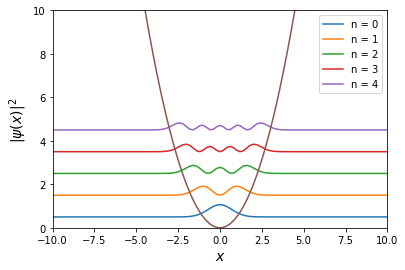

In [6]:
x=np.linspace(-L, L, 101)
Vharm=k*x**2/2

psi0=np.zeros(101)
psi1=np.zeros(101)
psi2=np.zeros(101)
psi3=np.zeros(101)
psi4=np.zeros(101)
for i in range(N):
    psi0=psi0+V[i][0]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi1=psi1+V[i][1]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi2=psi2+V[i][2]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi3=psi3+V[i][3]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi4=psi4+V[i][4]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    
plt.plot(x,np.abs(psi0)**2+E[0])
plt.plot(x,np.abs(psi1)**2+E[1])
plt.plot(x,np.abs(psi2)**2+E[2])
plt.plot(x,np.abs(psi3)**2+E[3])
plt.plot(x,np.abs(psi4)**2+E[4])
plt.plot(x,Vharm)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$|\psi(x)|^2$", fontsize=14)
plt.savefig('psi_harm.png') 
plt.legend(['n = 0','n = 1','n = 2','n = 3','n = 4'])
plt.xlim(-10,10)
plt.ylim(0,10)
plt.show()